# Exercise 7: Logistic Regression

Given a dataset consisting of pairs $(\mathbf{x}^{(i)}, y^{(i)})$, $\mathbf{x}^{(i)} \in \mathbb{R}^n$, $y^{(i)} \in \{ 0, 1 \}$, obtain the optimal hyperplane separating the two classes 0 and 1 using logistic regression.

First, we generate a synthetic dataset consisting of input vectors in 2D with classes 0 and 1, with overlapping Gaussian distributions:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

mu1 = np.array([5, 10])
mu2 = np.array([10, 5])
sigma = np.array([[8, 0],[0, 8]])

X1 = np.random.multivariate_normal(mu1, sigma, 100)
X2 = np.random.multivariate_normal(mu2, sigma, 100)
X = np.concatenate((np.ones((200, 1)), np.concatenate((X1, X2))), 1)
y = np.concatenate((np.zeros((100, 1)), np.ones((100, 1))), 0)

In [7]:
print(X.shape)
print(y.shape)

(200, 3)
(200, 1)


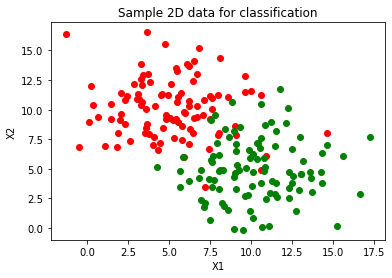

In [3]:
plt.plot(X1[:,0], X1[:,1], 'ro', label='Class 0')
plt.plot(X2[:,0], X2[:,1], 'go', label='Class 1')
plt.title('Sample 2D data for classification')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

The basic algorithm:

1. Choose an arbitrary $\theta^{(1)}$
2. Let $k = 1$
3. Calculate cost and gradient of the cost function for $\theta^{(k)}$
4. Take a step $\theta^{(k+1)} \leftarrow \theta^{(k)} - \alpha \sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)}) \mathbf{x}^{(i)}$
5. Let $k \leftarrow k+1$
6. If not done, repeat from step 3.

Cross entropy cost function is
$$ \ell(\theta) = \sum_{i=1}^m y^{(i)}\log(\hat{y}^{(i)}) + (1-y^{(i)})\log(1-\hat{y}^{(i)})$$


In [4]:
theta = np.zeros((3,1))
alpha = 0.0001

def sigmoid(z):
    return 1.0 / (1 + np.exp(z))

def crossentropy(theta, X, y, alpha):
    yhat = sigmoid(- X @ theta)
    cost = - (y * np.log(yhat) + (1 - y) * np.log(1 - yhat)).mean()
    grad_cost = X.T @ (yhat - y)
    return cost, grad_cost

for epoch in range(10000):
    cost, grad_cost = crossentropy(theta, X, y, alpha)
    if epoch % 1000 == 0:
        print('Epoch %d: cost %f' % (epoch, cost))
    theta = theta - alpha * grad_cost


Epoch 0: cost 0.693147
Epoch 1000: cost 0.202381
Epoch 2000: cost 0.202375
Epoch 3000: cost 0.202372
Epoch 4000: cost 0.202369
Epoch 5000: cost 0.202367
Epoch 6000: cost 0.202365
Epoch 7000: cost 0.202363
Epoch 8000: cost 0.202361
Epoch 9000: cost 0.202360


Given optimal $\theta$, we can interpret the vector as defining a line
$$\theta_1 x_1+\theta_2 x_2+\theta_0=0$$
To find any point, given $x_1$, use $x_2 = (-\theta_1 x_1 - \theta_0) / \theta_2$.

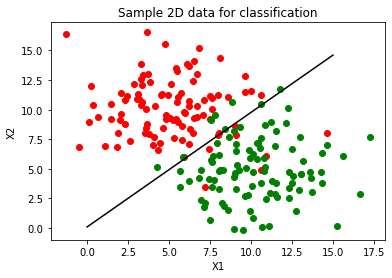

In [5]:
x11 = 0
x12 = 15
x21 = (-theta[1,0] * x11 - theta[0,0]) / theta[2,0]
x22 = (-theta[1,0] * x12 - theta[0,0]) / theta[2,0]

plt.plot(X1[:,0], X1[:,1], 'ro', label='Class 0')
plt.plot(X2[:,0], X2[:,1], 'go', label='Class 1')
plt.plot((x11, x12), (x21, x22), 'k-')
plt.title('Sample 2D data for classification')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


In [6]:
def h(X, theta):
    yhat = sigmoid(- X @ theta)
    preds = np.where(yhat >= 0.5, 1, 0)
    return preds

preds = h(X, theta)
accuracy = (preds == y).sum() / y.shape[0]
print('Training set accuracy = %f' % accuracy)

Training set accuracy = 0.925000
